In [28]:
import numpy as np
from time import process_time
from scipy.io import loadmat

import warnings
warnings.filterwarnings("ignore")
N = 16

In [21]:
pd = '' #path with data

In [22]:
data = loadmat(pd+'dataAnswer_mizuta_0_0.2_1.mat')
answers_reg = (np.array(data['answers']))
data = loadmat(pd+'dataChoi2_mizuta_0_0.2_1.mat')
chois_reg = np.array(data['choi'])
answers_reg[answers_reg<3] = 0
answers_reg[answers_reg==3] = 1

data = loadmat(pd+'dataAnswer_mizuta_0.1_0.2_0.9.mat')
answers_other = (np.array(data['answers']))
data = loadmat(pd+'dataChoi2_mizuta_0.1_0.2_0.9.mat')
chois_other = np.array(data['choi'])
answers_other[answers_other<3] = 0
answers_other[answers_other==3] = 1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.linear_model import Ridge

In [24]:
X = chois_reg
y = answers_reg

print([X.shape, y.shape])

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.1, random_state=777)

X_other = chois_other
y_other = answers_other
print([y_train.shape, y_test.shape, np.sum(y)/y.size])

[(60000, 256), (60000, 1)]
[(54000, 1), (6000, 1), 0.5557666666666666]


In [25]:
h = .02 
names = [
    "Nearest Neighbors", 
    "Linear SVM       ",
    "Poly SVM         ",
    "sigmoid SVM      ",
    "RBF SVM          ", 
    "Decision Tree    ",
    "Random Forest    ",
    "Neural Net       ",
    "AdaBoost         ",
    "Naive Bayes      ",
    "LDA              ",
    "QDA              "
    ]

classifiers = [ 
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(kernel="poly", degree=3),
    SVC(kernel="sigmoid"),
    SVC(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=0.01,hidden_layer_sizes=[32, 16, 8]),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis() 
    ]

In [29]:
print("Name   Method       Train,%;    Test,%;   Other,%;  F1_train;  F1_other; AUC_train; AUC_other") 

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score0 = clf.score(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_other = clf.score(X_other, y_other)
    y_t = clf.predict(X_train)
    y_p = clf.predict(X_other)
    
    
    f1_t = metrics.f1_score(y_train, y_t)
    f1_p = metrics.f1_score(y_other, y_p)
    auc_t = metrics.roc_auc_score(y_train, y_t)
    auc_p = metrics.roc_auc_score(y_other, y_p)
    
    print((name+"   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))    

Name   Method       Train,%;    Test,%;   Other,%;  F1_train;  F1_other; AUC_train; AUC_other
Nearest Neighbors   0.92844;   0.87117;   0.80936;   0.93495;   0.74422;   0.92911;   0.79353
Linear SVM          0.90544;   0.90133;   0.85996;   0.91308;   0.80481;   0.90722;   0.84014
Poly SVM            0.93880;   0.93200;   0.90674;   0.94474;   0.87493;   0.93874;   0.89677
sigmoid SVM         0.49961;   0.49767;   0.35928;   0.55820;   0.25901;   0.49087;   0.34667
RBF SVM             0.89452;   0.89533;   0.85018;   0.89997;   0.78545;   0.90000;   0.82498
Decision Tree       0.97628;   0.97550;   0.95220;   0.97869;   0.93861;   0.97603;   0.95318
Random Forest       0.97965;   0.97950;   0.95808;   0.98160;   0.94327;   0.98032;   0.94946
Neural Net          0.96169;   0.96050;   0.93028;   0.96618;   0.90958;   0.95901;   0.92808
AdaBoost            1.00000;   0.99183;   0.98200;   1.00000;   0.97624;   1.00000;   0.97945
Naive Bayes         0.80563;   0.80550;   0.65886;   0.78970

In [52]:
clf = RandomForestClassifier(max_depth=9, n_estimators=100)
clf.fit(X_train, y_train)
score0 = clf.score(X_train, y_train)
score = clf.score(X_test, y_test)
score_other = clf.score(X_other, y_other)
y_t = clf.predict(X_train)
y_reg = clf.predict(chois_reg)
y_p = clf.predict(X_other)
f1_t = metrics.f1_score(y_train, y_t)
f1_p = metrics.f1_score(y_other, y_p)
auc_t = metrics.roc_auc_score(y_train, y_t)
auc_p = metrics.roc_auc_score(y_other, y_p)
print(("   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))

   0.999;   0.994;   0.984;   0.999;   0.979;   0.999;   0.981


Text(0.5, 1.0, '$Predict 0.9$')

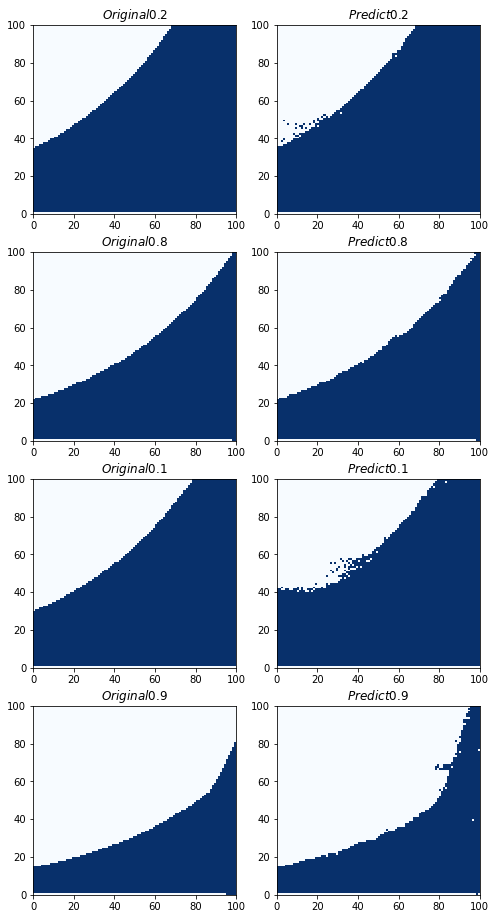

In [53]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 16)
N1 = 10000
N2 = 40000

ax = plt.subplot(421)
c = ax.pcolormesh(np.transpose(np.reshape(answers_reg[N1:N1+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Original 0.2$')

ax = plt.subplot(422)
c = ax.pcolormesh(np.transpose(np.reshape(y_reg[N1:N1+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Predict 0.2$')

ax = plt.subplot(423)
c = ax.pcolormesh(np.transpose(np.reshape(answers_reg[N2:N2+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Original 0.8$')

ax = plt.subplot(424)
c = ax.pcolormesh(np.transpose(np.reshape(y_reg[N2:N2+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Predict 0.8$')

N1 = 0
N2 = 40000

ax = plt.subplot(425)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other[N1:N1+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Original 0.1$')

ax = plt.subplot(426)
c = ax.pcolormesh(np.transpose(np.reshape(y_p[N1:N1+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Predict 0.1$')

ax = plt.subplot(427)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other[N2:N2+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Original 0.9$')

ax = plt.subplot(428)
c = ax.pcolormesh(np.transpose(np.reshape(y_p[N2:N2+10000], (100,100))), cmap='Blues_r')
ax.set_title(r'$Predict 0.9$')